In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import os

In [2]:
df = pd.read_csv("/Users/aman0/Documents/Cust_Seg/Mall_Customers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [5]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

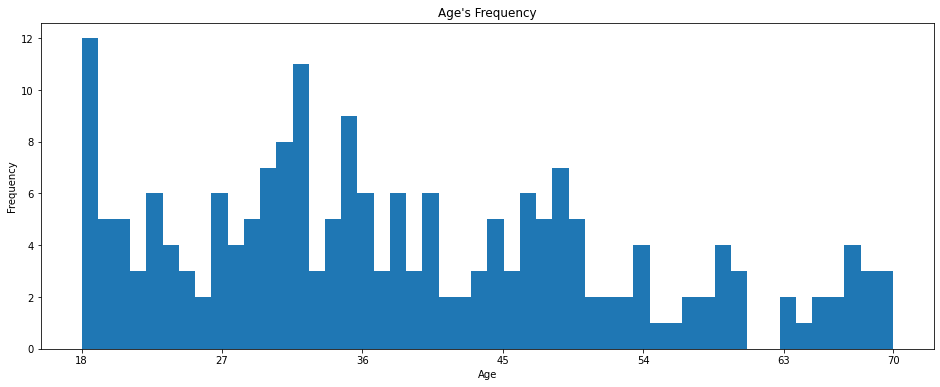

In [6]:
pl.figure(figsize=(16,6))
pl.title("Age's Frequency")
pl.hist(df['Age'], bins=50)
pl.xlabel('Age')
pl.ylabel('Frequency')
pl.xticks([18,27,36,45,54,63,70])
pl.show()

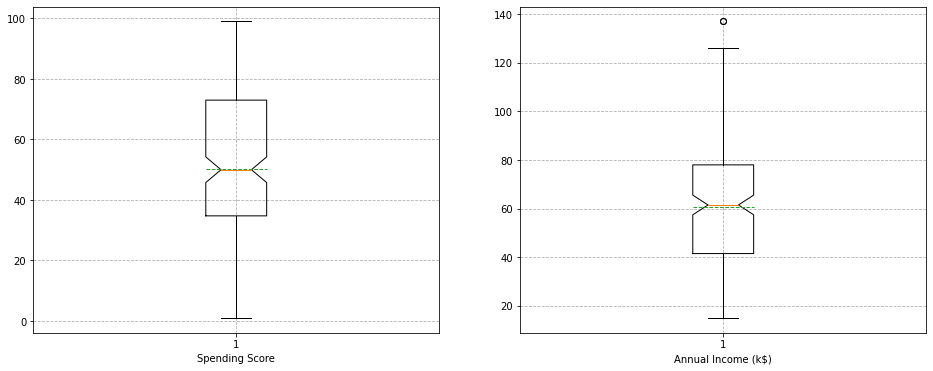

In [7]:
pl.figure(figsize =(16,6))
pl.subplot(1,2,1)
pl.boxplot(df["Spending Score (1-100)"],notch=True, showmeans=True, meanline=True)
pl.xlabel('Spending Score')
pl.grid(linestyle = '--')
pl.subplot(1,2,2)
pl.boxplot(df["Annual Income (k$)"],notch=True, showmeans=True, meanline=True)
pl.xlabel('Annual Income (k$)')
pl.grid(linestyle = '--')
pl.show()


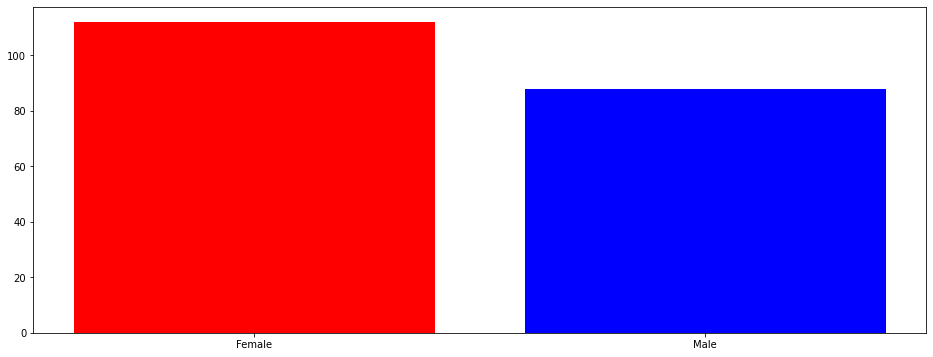

In [8]:
genders = df.Gender.value_counts()
pl.figure(figsize=(16,6))
x= genders.index
y= genders.values
pl.bar(x,y,color =['red','blue'])
pl.show()

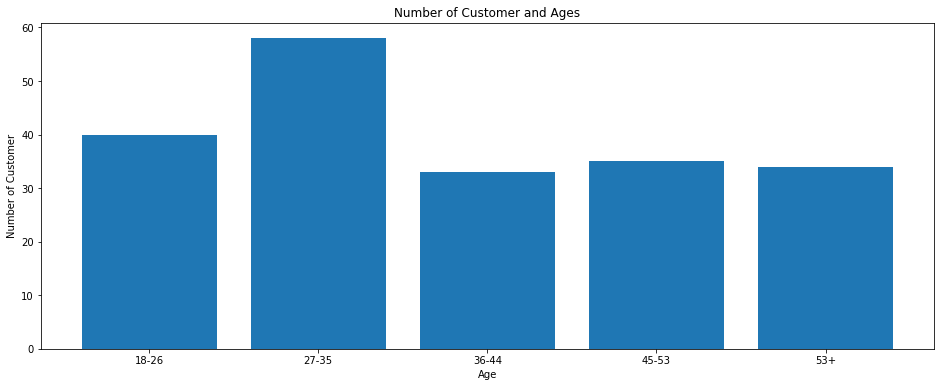

In [9]:
age18_26 = df.Age[(df.Age <= 26) & (df.Age >= 18)]
age27_35 = df.Age[(df.Age <= 35) & (df.Age >= 27)]
age36_44 = df.Age[(df.Age <= 44) & (df.Age >= 36)]
age45_53 = df.Age[(df.Age <= 53) & (df.Age >= 45)]
age53above = df.Age[df.Age >= 54]

x = ["18-26","27-35","36-44","45-53","53+"]
y = [len(age18_26.values),len(age27_35.values),len(age36_44.values),len(age45_53.values),len(age53above.values)]

pl.figure(figsize=(16,6))
pl.bar(x, y)
pl.title("Number of Customer and Ages")
pl.xlabel("Age")
pl.ylabel("Number of Customer")
pl.show()



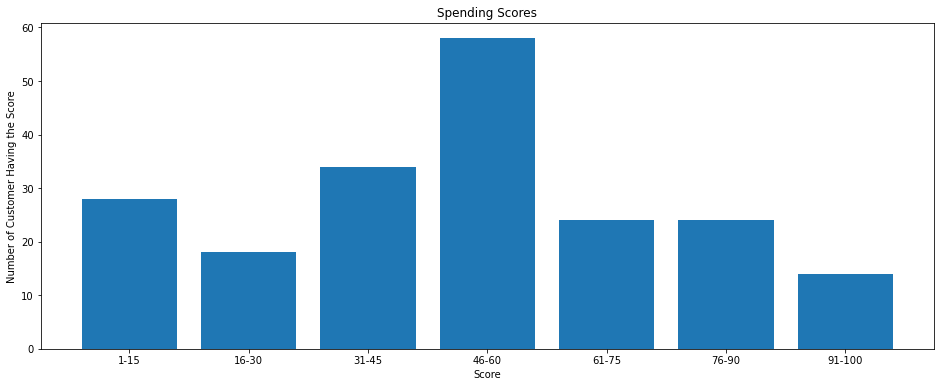

In [10]:
ss1_15 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 15)]
ss16_30 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 16) & (df["Spending Score (1-100)"] <= 30)]
ss31_45 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 31) & (df["Spending Score (1-100)"] <= 45)]
ss46_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 46) & (df["Spending Score (1-100)"] <= 60)]
ss61_75 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 75)]
ss76_90 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 76) & (df["Spending Score (1-100)"] <= 90)]
ss91_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 91) & (df["Spending Score (1-100)"] <= 100)]
ssx = ["1-15", "16-30", "31-45", "46-60", "61-75", "76-90", "91-100"]
ssy = [len(ss1_15.values), len(ss16_30.values), len(ss31_45.values), len(ss46_60.values), len(ss61_75.values)
       , len(ss76_90.values), len(ss91_100.values)]
pl.figure(figsize=(16,6))
pl.bar(ssx,ssy)
pl.title("Spending Scores")
pl.xlabel("Score")
pl.ylabel("Number of Customer Having the Score")
pl.show()

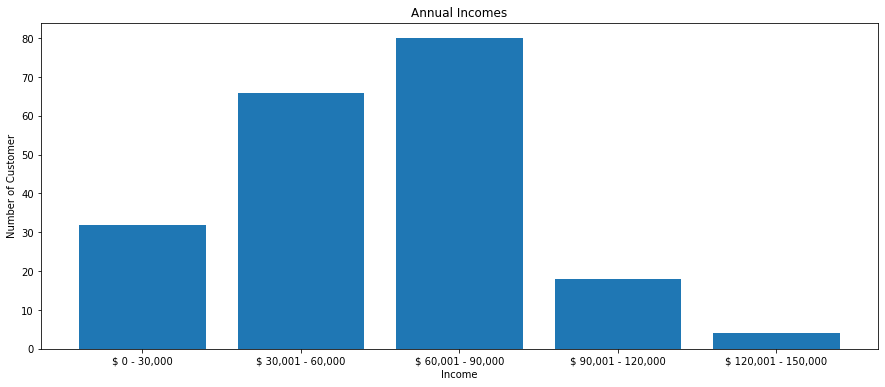

In [11]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

pl.figure(figsize=(15,6))
pl.bar(aix,aiy)
pl.title("Annual Incomes")
pl.xlabel("Income")
pl.ylabel("Number of Customer")
pl.show()

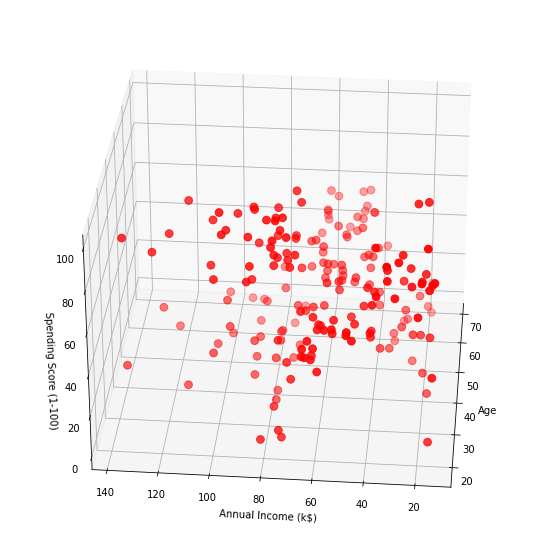

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure(figsize=(32,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='red', s=60)
ax.view_init(30, 185)
pl.xlabel("Age")
pl.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
pl.show()

C:\Users\aman0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


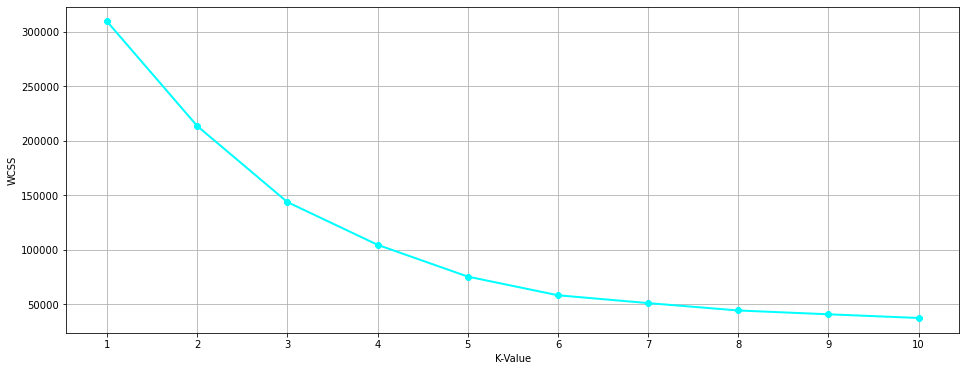

In [18]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(16,6))    
pl.grid()
pl.plot(range(1,11),wcss, linewidth=2, color="cyan", marker ="8")
pl.xlabel("K-Value")
pl.xticks(np.arange(1,11,1))
pl.ylabel("WCSS")
pl.show()

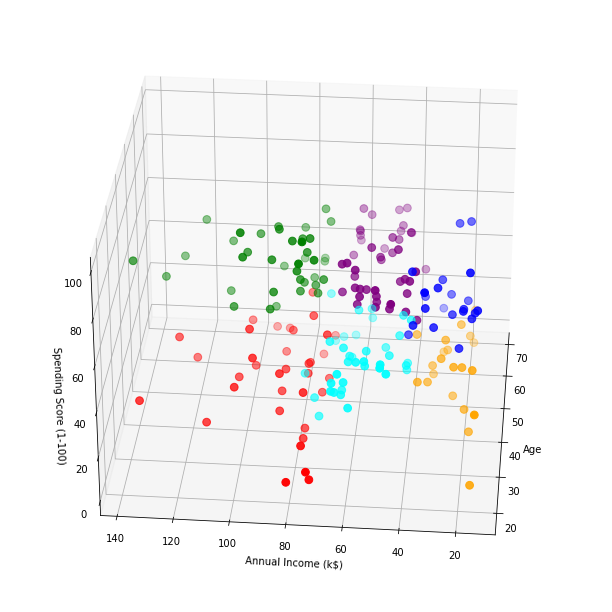

In [17]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
 

fig = pl.figure(figsize=(20,11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='cyan', s=60)
ax.view_init(30, 185)
pl.xlabel("Age")
pl.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
pl.show()

